# Ejercicios Clase: Álgebra en Ciencia de Datos
### Estudiante: Edgard Iglesias Rubio

## Unidad 2
### Convergencia en Imágenes

Programe una función (pura, determinista) $f$ que transforme imágenes en imágenes (escala de grises tamaño 400x600) y satisfaga las siguientes propiedades:

1. $f$ es inyectiva, es decir, si $x$ y $y$ son imágetes distintas entonces $f(x) \neq f(y)$
2. Sea $a$ una foto suya fija, para cualquier imágen $x$ la sucesión de imágenes $f^{n}(x)_{n \geq 0}$ converge a $a$. Para garantizar esta convergencia programe un algoritmo que dado $x$ diga a partir de cuantas iteraciones $N$ el error relativo $\frac{\|f^{n}(x)-a\|}{\|a\|}$ es menor a $0.01$ para cualquier $n \geq N$

In [1]:
!pip install Pillow

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
#imports
from PIL import Image
import numpy as np

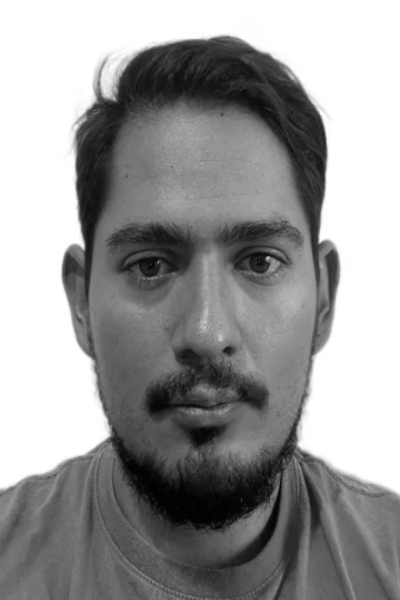

In [3]:
#Cargando foto propia
img = Image.open('img/fotoPropia.jpeg')
#Reescalando a 400x600
img = img.resize((400, 600))
#Convirtiendo a Blanco y Negro
img = img.convert('L')
img

In [4]:
#convirtiendo imagen propia a array
a = np.array(img).flatten().astype(int)
a

array([255, 254, 255, ..., 112, 113, 113])

A continuacion se define la funcion $f$ que dada una imagen la convierte a escala de grises dimesion 400x600 y realiza una transformación lineal para aproximarla a la imagen original representada por el vector $a$

In [5]:
def f(x):
    #Rescalando 400x600
    x_vec = x.resize((400, 600))
    #Convirtiendo a Blanco y Negro
    x_vec = x_vec.convert('L')
    #Convirtiendo imagen a vector
    x_vec = np.array(x_vec).flatten().astype(int)
    
    #transformando imagen x hacia imagen a
    x_vec = np.where(x_vec > a, x_vec - 1, x_vec)
    x_vec = np.where(x_vec < a, x_vec + 1, x_vec)
    
    #retornando imagen transformada
    return Image.fromarray(x_vec.reshape((600,400)).astype('uint8'))

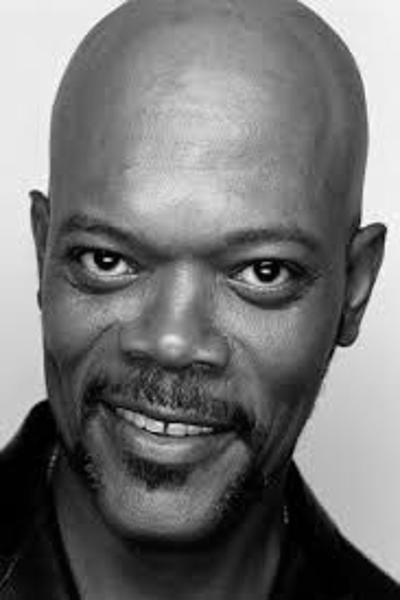

In [6]:
#Ejemplo cargando una imagen 2
#Espacio para cargar cualqueir foto unicamente colocando la ruta hacia la imagen
img2 = Image.open('img/fotoinput.jpeg')
#Reescalando a 400x600
img2 = img2.resize((400, 600))
#Convirtiendo a Blanco y Negro
img2 = img2.convert('L')
img2

A cotinuacion se muestra la foto insumo luego de 10 iteraciones y su error luego de las iteraciones:

Error luego de 10 iteraciones: 0.48938788843563275


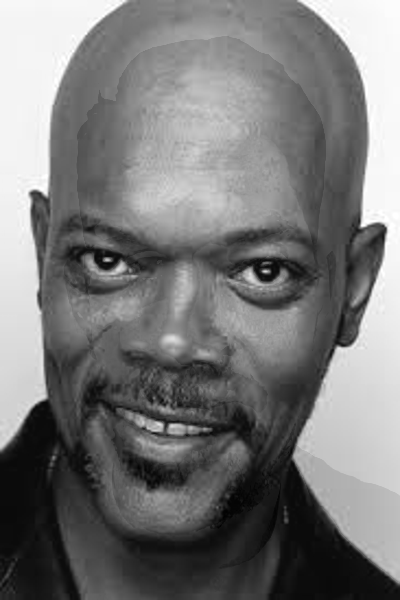

In [7]:
x=img2

for _ in range(0,10):
    x=f(x)
    
#calculando error
x_vec=np.array(x).flatten().astype(int)
error=np.linalg.norm(x_vec-a)/np.linalg.norm(a)    

print('Error luego de 10 iteraciones: {error}'.format(error=error))
x

A continuacion se presenta el algoritmo que dada una imagen x, identifica el numero de iteraciones N para que se tenga un error relativo <= 0.01:

In [8]:
i=0
error=1
#imagen en estado original
x = img2
while error>0.01:
    x=f(x)
    x_vec=np.array(x).flatten().astype(int)
    error=np.linalg.norm(x_vec-a)/np.linalg.norm(a)
    i+=1
print('Se obtiene un error menor a 0.01 cuando n>={i} con un error relativo={error}'.format(i=i,error=error))

Se obtiene un error menor a 0.01 cuando n>=237 con un error relativo=0.009488337489551938


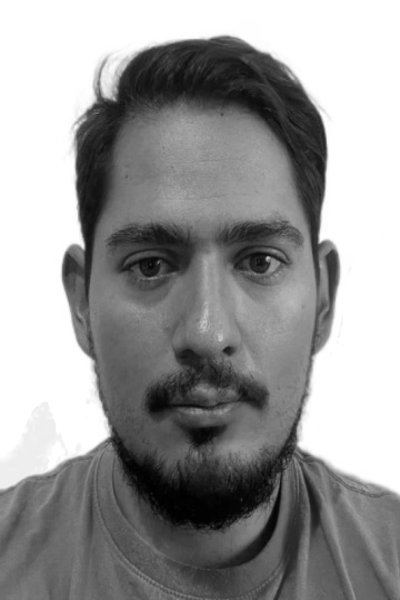

In [9]:
x